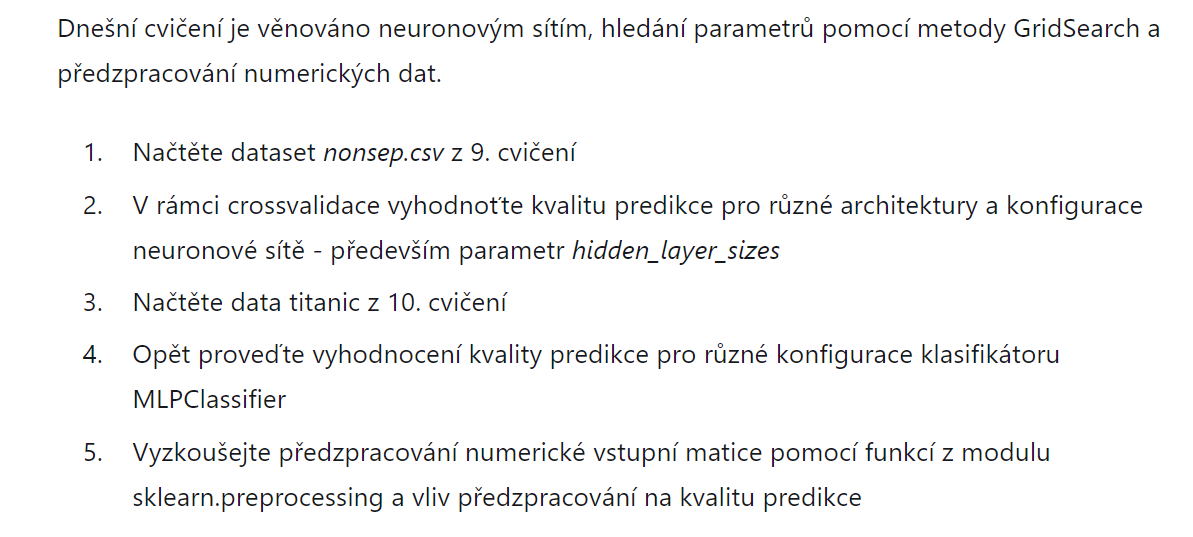

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [148]:
import warnings
warnings.filterwarnings('ignore')

In [186]:
def get_dataframe_from_grid_search(grid_search):
    mean_results = grid_search.cv_results_['mean_test_score']
    params = np.array(grid_search.cv_results_['params'])
    
    index = {}
    
    for p in params:
        for k, v in p.items():
            value = index.get(k, [])
            value.append(v)
            index[k] = value 
    
    results = pd.DataFrame.from_dict(index)
    results['Score'] = mean_results
    return results

# Úkol 1 a 2

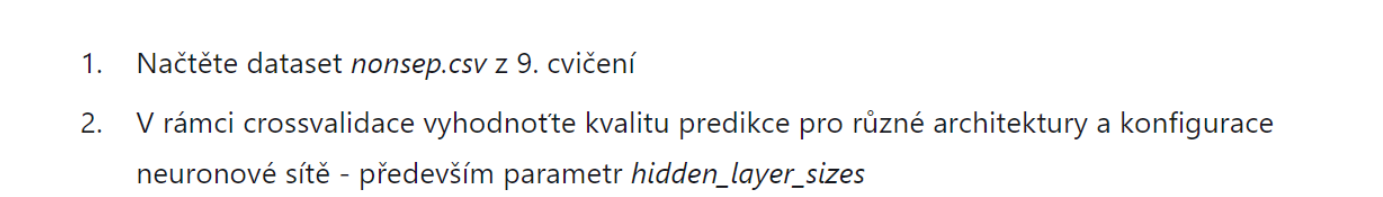

In [150]:
nonsep_path = f'nonsep.csv'

In [151]:
nonsep = pd.read_csv(nonsep_path, sep=';', header=None)

In [152]:
nonsep.head()

,0,1,2
0,1.70,0.15,1
1,3.65,2.05,1
2,2.10,2.40,1
3,2.35,2.20,1
4,4.10,2.30,1


In [153]:
def get_nonsep():
    X = nonsep.iloc[:, [0, 1]].values
    y = nonsep.iloc[:, [2]].values
    return X, y

In [154]:
get_nonsep();

In [155]:
hidden_layer_sizes = [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,)]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['sgd', 'adam']
learning_rate = ['constant', 'invscaling', 'adaptive']
max_iter = [200]


params = {
    'solver': solver,
    'activation': activation,
    'hidden_layer_sizes': hidden_layer_sizes,
    'learning_rate': learning_rate,
    'max_iter': max_iter
}

In [157]:
grid_search = GridSearchCV(estimator = MLPClassifier(), param_grid = params, cv = 2)

X, y = get_nonsep()
grid_search.fit(X, y.ravel());

# Úkoly 3, 4, 5    

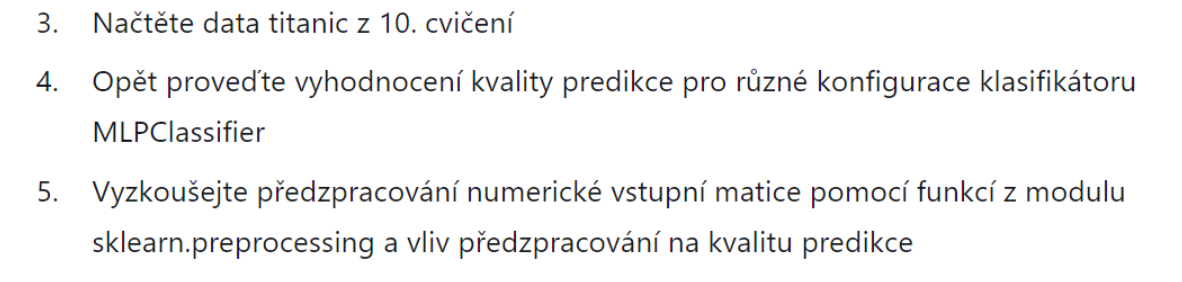

In [158]:
titanic_path = f'titanic.csv'

In [159]:
titanic = pd.read_csv(titanic_path, sep=',')

In [160]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Jsou prázdné záznamy, rozhodl jsem se věk doplnit průměrem a Cabin pro klasifikaci nevyužít..

In [161]:
np.sum(pd.isna(titanic))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [162]:
def get_titanic():
    X = titanic.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
    X = X.fillna(X.mean())
    y = titanic.loc[:, 'Survived']
    return X, y

In [163]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [164]:
def get_titanic_processed():
    titanic_copy = titanic.copy()
    titanic_copy = titanic_copy.fillna(titanic_copy.mean())
    preprocessed = pd.DataFrame()
    #preprocessed['PassengerId'] = titanic['PassengerId']
    preprocessed['Pclass'] = titanic_copy['Pclass']
    #preprocessed['Sex'] = LabelEncoder().fit_transform(titanic_copy['Sex'])
    preprocessed['Age'] = MinMaxScaler().fit_transform(titanic_copy['Age'].values.reshape(-1, 1))
    preprocessed['Fare'] = MinMaxScaler().fit_transform(titanic_copy['Fare'].values.reshape(-1, 1))
    preprocessed['SibSp'] = MinMaxScaler().fit_transform(titanic_copy['SibSp'].values.reshape(-1, 1))
    preprocessed['Parch'] = MinMaxScaler().fit_transform(titanic_copy['Parch'].values.reshape(-1, 1))
    #preprocessed = preprocessed.join(pd.get_dummies(titanic['Cabin']))
    preprocessed = preprocessed.join(pd.get_dummies(titanic_copy['Embarked']))
    return preprocessed, titanic['Survived']

In [168]:
X, y = get_titanic();

In [169]:
get_titanic_processed();

In [170]:
grid_search_raw = GridSearchCV(estimator = MLPClassifier(), param_grid = params)

X, y = get_titanic()
grid_search_raw.fit(X, y.ravel())

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (7,), (8,), (9,), (10,),
                                                (11,), (12,), (13,), (14,),
                                                (15,), (16,), (17,), (18,),
                                                (19,), (20,), (21,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [2000], 'solver': ['sgd', 'adam']})

In [171]:
grid_search_processed = GridSearchCV(estimator = MLPClassifier(), param_grid = params)

X, y = get_titanic_processed()
grid_search_processed.fit(X, y.ravel())

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (7,), (8,), (9,), (10,),
                                                (11,), (12,), (13,), (14,),
                                                (15,), (16,), (17,), (18,),
                                                (19,), (20,), (21,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [2000], 'solver': ['sgd', 'adam']})

# Výsledky

In [175]:
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)

## Non sep

In [190]:
get_dataframe_from_grid_search(grid_search).sort_values(by='Score')

,activation,hidden_layer_sizes,learning_rate,max_iter,solver,Score
14,identity,"(3,)",invscaling,200,sgd,0.292857
143,tanh,"(4,)",adaptive,200,adam,0.292857
104,logistic,"(8,)",invscaling,200,sgd,0.321429
80,logistic,"(4,)",invscaling,200,sgd,0.364286
21,identity,"(4,)",invscaling,200,adam,0.364286
123,tanh,"(1,)",invscaling,200,adam,0.378571
35,identity,"(6,)",adaptive,200,adam,0.400000
146,tanh,"(5,)",invscaling,200,sgd,0.428571
65,logistic,"(1,)",adaptive,200,adam,0.442857
110,logistic,"(9,)",invscaling,200,sgd,0.442857


## Nepředzpracované

In [191]:
get_dataframe_from_grid_search(grid_search_raw).sort_values(by='Score')

,activation,hidden_layer_sizes,learning_rate,max_iter,solver,Score
206,logistic,"(14,)",invscaling,2000,sgd,0.374804
170,logistic,"(8,)",invscaling,2000,sgd,0.406308
218,logistic,"(16,)",invscaling,2000,sgd,0.423162
152,logistic,"(5,)",invscaling,2000,sgd,0.427625
254,tanh,"(1,)",invscaling,2000,sgd,0.434398
14,identity,"(3,)",invscaling,2000,sgd,0.437769
68,identity,"(12,)",invscaling,2000,sgd,0.441109
242,logistic,"(20,)",invscaling,2000,sgd,0.449940
200,logistic,"(13,)",invscaling,2000,sgd,0.461358
236,logistic,"(19,)",invscaling,2000,sgd,0.463336


## Předzpracované

In [192]:
get_dataframe_from_grid_search(grid_search_processed).sort_values(by='Score')

,activation,hidden_layer_sizes,learning_rate,max_iter,solver,Score
482,relu,"(18,)",invscaling,2000,sgd,0.419779
128,logistic,"(1,)",invscaling,2000,sgd,0.428780
242,logistic,"(20,)",invscaling,2000,sgd,0.428780
152,logistic,"(5,)",invscaling,2000,sgd,0.431028
170,logistic,"(8,)",invscaling,2000,sgd,0.431028
218,logistic,"(16,)",invscaling,2000,sgd,0.431028
74,identity,"(13,)",invscaling,2000,sgd,0.433218
302,tanh,"(9,)",invscaling,2000,sgd,0.434423
416,relu,"(7,)",invscaling,2000,sgd,0.435497
188,logistic,"(11,)",invscaling,2000,sgd,0.435522
